In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
try:
    cabs = pd.read_csv('/Users/elias/Desktop/cab_rides/moved_project_sql_result_01.csv', sep=',')

except FileNotFoundError:
    cabs = pd.read_csv('moved_project_sql_result_01.csv', sep=',')



try:
    trips = pd.read_csv('/Users/elias/Desktop/cab_rides/moved_project_sql_result_04.csv', sep=',')

except FileNotFoundError:
    trips = pd.read_csv('moved_project_sql_result_04.csv', sep=',')



try:
    details = pd.read_csv('/Users/elias/Desktop/cab_rides/moved_project_sql_result_07.csv', sep=',')

except FileNotFoundError:
    details = pd.read_csv('moved_project_sql_result_07.csv', sep=',')



In [3]:
# the top 10 neighborhoods in terms of drop-offs


top_10 = trips.sort_values(by='average_trips', ascending=False).head(10)
display(top_10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


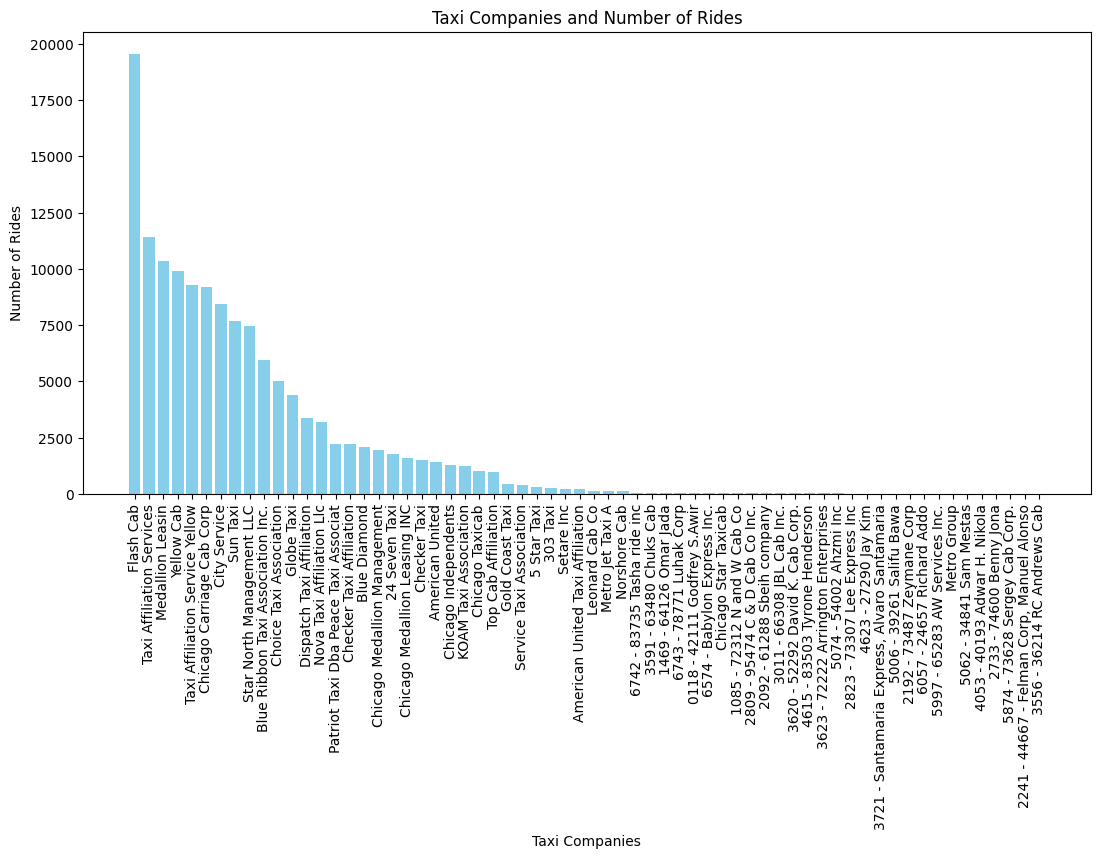

In [4]:
#Taxi Companies and Number of Rides:

# Data for Taxi Companies and Number of Rides
# Plotting the graph
plt.figure(figsize=(13,6))
plt.bar(cabs['company_name'], cabs['trips_amount'], color='skyblue')
plt.xlabel('Taxi Companies')
plt.ylabel('Number of Rides')
plt.title('Taxi Companies and Number of Rides')
plt.xticks(rotation=90)
plt.show()



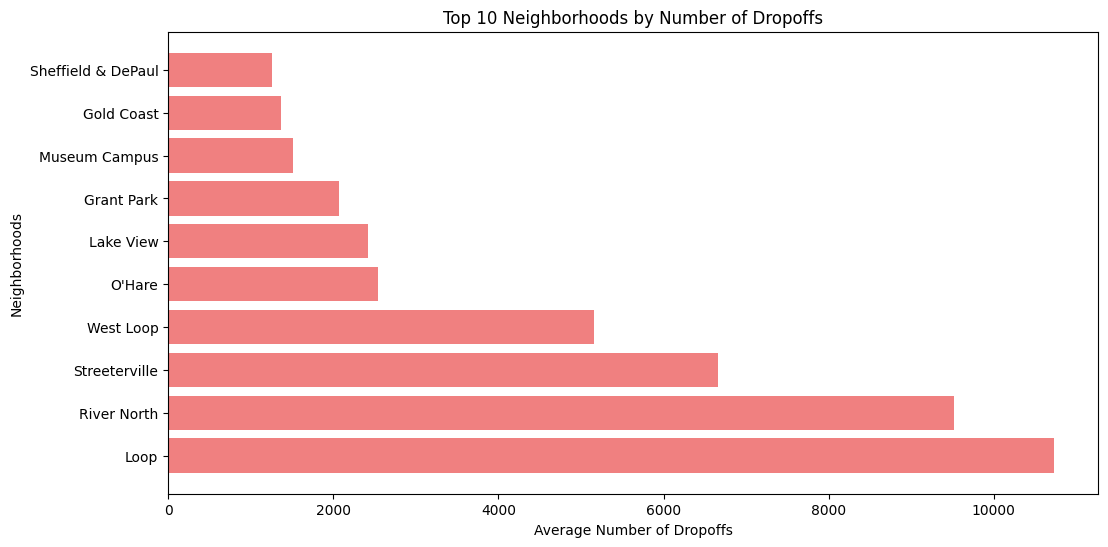

In [5]:
# Top 10 Neighborhoods by Number of Dropoffs:

# Data for Top 10 Neighborhoods by Number of Dropoffs

# Plotting the graph
plt.figure(figsize=(12,6))
plt.barh(top_10['dropoff_location_name'], top_10['average_trips'], color='lightcoral')
plt.xlabel('Average Number of Dropoffs')
plt.ylabel('Neighborhoods')
plt.title('Top 10 Neighborhoods by Number of Dropoffs')
plt.show()

In [7]:
# test the hypothesis that the average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays, we can conduct a hypothesis test comparing the average duration of rides on rainy Saturdays to the average duration of rides on non-rainy Saturdays.


#- Null Hypothesis (H0): The average duration of rides from the Loop to O'Hare International Airport is the same on rainy Saturdays.
#- Alternative Hypothesis (Ha): The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.


# Split the data into two groups
rainy_saturdays = details[details['weather_conditions'] == 'Bad']
non_rainy_saturdays = details[details['weather_conditions'] == 'Good']

# Calculate the average duration of rides for each group
avg_duration_rainy = rainy_saturdays['duration_seconds'].mean()
avg_duration_non_rainy = non_rainy_saturdays['duration_seconds'].mean()

# Perform a t-test
t_stat, p_value = stats.ttest_ind(rainy_saturdays['duration_seconds'], non_rainy_saturdays['duration_seconds'])

# Determine significance
alpha = 0.05
if p_value < alpha:  
    display("The difference in average duration of rides on rainy Saturdays and non-rainy Saturdays is statistically significant.")
else:
    display("There is no statistically significant difference in average duration of rides on rainy Saturdays and non-rainy Saturdays.")


'The difference in average duration of rides on rainy Saturdays and non-rainy Saturdays is statistically significant.'

In conclusion, based on the results of the t-test, we reject the null hypothesis that the average duration of rides from the Loop to O'Hare International Airport is the same on rainy Saturdays. The alternative hypothesis that the average duration of rides changes on rainy Saturdays is supported by the statistical significance of the difference between rainy and non-rainy Saturdays. This suggests that weather conditions, specifically rain, have an impact on the average duration of rides to the airport.